In [1]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact
from os import path

# import plotly.graph_objects as go
import pandas as pd

# from quimb import *
import time



No. of reps:  10000
No. of reps:  10000
No. of reps:  10000
No. of reps:  10000
No. of reps:  10000


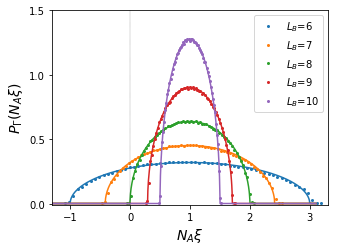

In [23]:
out_dir = 'data/' 
r=2 # local Hilbert space dim
symm=0

if r>4:
    L_sw=np.arange(8,13)
else:
    L_sw=np.arange(12,17)
    
La=3
Lb=La
Na=r**La
Nb=r**Lb

def semicirc_dist(Q,x,x0):
    # my Q is from Ludwig's paper
    R= 2*sqrt(Q)
    fx= 2/(pi*R**2)*(R**2-(x-x0)**2+0j)**0.5
    return fx

plt.figure(figsize=(4.8,3.6))
for i_l in range(len(L_sw)):
    L=L_sw[i_l]
    Lc=L-La-Lb

    if symm==1:
        f1= 'NS_r_%d_LA_%d_L_%d_symm.npz' % (r,La+Lb,L)
        Nab_r=r**(La+Lb-1)
    else:
        f1= 'NS_r_%d_LA_%d_L_%d.npz' % (r,La+Lb,L)
        Nab_r=Na*Nb

    fname = out_dir+f1
    if path.exists(fname):
        npzfile = np.load(fname)
        v1T=npzfile['evals']
        print('No. of reps: ', npzfile['Nrep'])
    else:
        continue
    
    if symm==1:
        if r**Lc > 4* r**(La+Lb)+1:
            num_bins = 200
            print(L)
        else:
            num_bins = 60
    else:
        num_bins = 60
        
    n, bin_edges = np.histogram(v1T, bins=num_bins)
    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2

    if symm==1:
        n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])    
    else:
        n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])  
        
    plt.plot(bins_center,n,'o',markersize=2,color='C%d' % (i_l), label='$L_B$=%d' % (Lc))
#     plt.semilogy(bins_center,n,'o',markersize=2,color='C%d' % (i_l), label='$L_C$=%d' % (Lc))


    if r>2:
        xplot=np.linspace(-1.3,2.3,1000)
    else:
        if symm==1:
            xplot=np.linspace(-1.9,2.9,1000)
        else:
            xplot=np.linspace(-1.9,3.1,1000)

    if symm==1:
        fx1= semicirc_dist(Na*Nb/r**(Lc+1),xplot,0)*(r-1)/r
        fx2= semicirc_dist(Na*Nb/r**(Lc+1),xplot,1)/r
        plt.plot(xplot,np.real(fx1+fx2),color='C%d' % (i_l))
#         plt.semilogy(xplot,np.real(fx1+fx2),color='C%d' % (i_l))
    else:
        fx= semicirc_dist(Na*Nb/r**Lc,xplot,1)
        plt.plot(xplot,np.real(fx),color='C%d' % (i_l))


lw=0.2
ymax=1.5 #4
plt.plot( [0,0],[0,ymax],'k--',linewidth=lw)
plt.ylim(-0.01,ymax)
# plt.xlim(-1.1,2.1)
plt.xlim(-1.3,3.3)
plt.yticks(np.arange(0.,ymax+0.1,0.5))
plt.legend()
fsize=14
if symm==1:
    plt.ylabel(r'$P_\Gamma(R^{-1} N_A \xi)$',fontsize = fsize)
    plt.xlabel(r"$R^{-1} N_A \xi$",fontsize = fsize)
else:
    plt.ylabel(r'$P_\Gamma(N_A \xi)$',fontsize = fsize)
    plt.xlabel(r"$N_A \xi$",fontsize = fsize)
    
plt.tight_layout()
if symm==1:
    plt.savefig('figs/NS_r_%d_LA_%d_symm.pdf' % (r,La+Lb))
else:
    plt.savefig('figs/NS_r_%d_LA_%d.pdf' % (r,La+Lb))
plt.show()

In [18]:
out_dir = 'data/' 
r=2 # local Hilbert space dim
symm=0

if r>4:
    L_sw=np.arange(8,13)
else:
    L_sw=np.arange(12,17)
La=3
Lb=La
Na=r**La
Nb=r**Lb

def semicirc_dist(N,Q,x,x0):
    # my Q is from Ludwig's paper
    R= 2*sqrt(Q)
    fx= 2/(pi*R**2)*(R**2-(x-x0)**2+0j)**0.5
    return fx

if r==2:
    num_bins = 120 #r=2
elif r==3:
    num_bins = 200 #r=3
elif r==5:
    num_bins = 200 #r=3

    
Pn=np.zeros((num_bins,len(L_sw)))
bins_center=np.zeros((num_bins,len(L_sw)))

xplot=np.linspace(-1.9,2.9,1000)
fx=np.zeros((len(xplot),len(L_sw)))
colors=[]

for i_l in range(len(L_sw)):
    L=L_sw[i_l]
    Lc=L-La-Lb

    if symm==1:
        f1= 'NS_r_%d_LA_%d_L_%d_symm.npz' % (r,La+Lb,L)
        Nab_r=r**(La+Lb-1)
    else:
        f1= 'NS_r_%d_LA_%d_L_%d.npz' % (r,La+Lb,L)
        Nab_r=Na*Nb

    fname = out_dir+f1
    if path.exists(fname):
        npzfile = np.load(fname)
        v1T=npzfile['evals']
        print(L, ', No. of reps: ', npzfile['Nrep'])
    else:
        continue
        
    colors.append('C%d' % (i_l))
    n, bin_edges = np.histogram(v1T, bins=num_bins)
    bins_center[:,i_l]= (bin_edges[0:num_bins]+ bin_edges[1:])/2

    if symm==1:
        Pn[:,i_l]= n/np.sum(n)/(bin_edges[1]-bin_edges[0])    
        fx1= semicirc_dist(Nab_r/r,Na*Nb/r**(Lc+1),xplot,0)*(r-1)/r
        fx2= semicirc_dist(Nab_r/r,Na*Nb/r**(Lc+1),xplot,1)/r
        fx[:,i_l]=np.real(fx1+fx2)
    else:
        Pn[:,i_l]= n/np.sum(n)/(bin_edges[1]-bin_edges[0])  
        fx[:,i_l]= np.real(semicirc_dist(Nab_r,Na*Nb/r**Lc,xplot,1))

12 , No. of reps:  10000
13 , No. of reps:  10000
14 , No. of reps:  10000
15 , No. of reps:  10000
16 , No. of reps:  10000


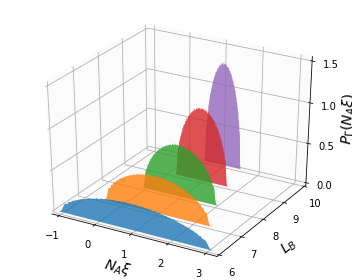

In [22]:
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import axes3d
import numpy as np

# These will be (200, 4), (200, 4), and (4)
# freq_data = np.linspace(0,300,200)[:,None] * np.ones(4)[None,:]
# amp_data = np.random.rand(200*4).reshape((200,4))
# rad_data = np.linspace(0,2,4)

freq_data= bins_center
amp_data= Pn
rad_data= L_sw-(La+Lb)

verts = []
verts_fit = []

for irad in range(len(rad_data)):
    # I'm adding a zero amplitude at the beginning and the end to get a nice
    # flat bottom on the polygons
    xs = np.concatenate([[freq_data[0,irad]], freq_data[:,irad], [freq_data[-1,irad]]])
    ys = np.concatenate([[0],amp_data[:,irad],[0]])
    verts.append(list(zip(xs, ys)))

    xs_fit = np.concatenate([[xplot[0]], xplot[:], [xplot[-1]]])
    ys_fit = np.concatenate([[0], fx[:,irad],[0]])
    verts_fit.append(list(zip(xs_fit, ys_fit)))
    
#     ['r', 'g', 'c', 'y']
poly = PolyCollection(verts , facecolors = colors)#, linestyle=':' , edgecolor='black',linewidths=(2,),)
poly.set_alpha(.8)

# poly_fit = PolyCollection(verts_fit, facecolors = ('None',), edgecolor='black' ,linewidths=(1,),)
# poly_fit.set_alpha(0.2)


# plt.style.use('seaborn-poster')

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(35, 240) # r=2
# ax.view_init(25, 250) # r=3
# ax.view_init(20, 250) # r=3

# The zdir keyword makes it plot the "z" vertex dimension (radius)
# along the y axis. The zs keyword sets each polygon at the
# correct radius value.
ax.add_collection3d(poly, zs=rad_data, zdir='y')
# ax.add_collection3d(poly_fit, zs=rad_data, zdir='y')

ax.set_xlim3d(freq_data.min(), freq_data.max())
ax.set_ylim3d(rad_data.min(), rad_data.max())
ax.set_yticks(rad_data)
if r==2:
    ax.set_xticks(np.arange(-1,3.01,1)) # r=2
#     zmax=1.0 # r=2 
    zmax=1.52 # r=2
    ax.set_zticks(np.arange(0,zmax,0.5)) # r=2
elif r==3:
    ax.set_xticks(np.arange(-1,2.1,1)) # r=3
    zmax=3.5 # r=3
    ax.set_zticks(np.arange(0,zmax,1)) 
elif r==4:
    ax.set_xticks(np.arange(-1,2.1,1)) # r=4
    zmax=4 # r=3
    ax.set_zticks(np.arange(0,zmax,1)) 
elif r==5:
    ax.set_xticks(np.arange(-1,2.1,1)) 
    zmax=14 
    ax.set_zticks(np.arange(0,zmax,4)) 


ax.set_zlim3d(0,zmax)


xc=0.97
ac=0.4
ax.w_xaxis.set_pane_color((xc,xc,xc, ac))
ax.w_yaxis.set_pane_color((xc,xc,xc, ac))
ax.w_zaxis.set_pane_color((xc,xc,xc, ac))


fsize=14
ax.set_ylabel(r"$L_B$",fontsize = fsize)
if symm==1:
    ax.set_zlabel(r'$P_\Gamma(R^{-1} N \xi)$',fontsize = fsize)
    ax.set_xlabel(r"$R^{-1} N \xi$",fontsize = fsize)
else:
    ax.set_zlabel(r'$P_\Gamma(N_A \xi)$',fontsize = fsize)
    ax.set_xlabel(r"$N_A \xi$",fontsize = fsize)

plt.tight_layout()
if symm==1:
    plt.savefig('figs/NS3d_r_%d_LA_%d_symm3.pdf' % (r,La+Lb))
else:
    plt.savefig('figs/NS3d_r_%d_LA_%d.pdf' % (r,La+Lb))
plt.show()

In [95]:
print(colors)

['C0', 'C1', 'C2', 'C3']
